In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d

In [ ]:
image_path = r"296059.jpg"
img = plt.imread(image_path)
if img.ndim == 3:
    img = img.mean(axis=2)
x = img.astype(float)
x = x / x.max()
print("Image shape:", x.shape)

Image shape: (321, 481)


In [15]:
def gaussian_kernel(size=9, sigma=2.0):
    ax = np.linspace(-(size // 2), size // 2, size)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-(xx**2 + yy**2) / (2 * sigma**2))
    kernel /= kernel.sum()
    return kernel
kernel = gaussian_kernel(size=9, sigma=2.0)

In [16]:
def forward_blur(image, kernel, noise_std=0.01):
    Ax = convolve2d(image, kernel, mode="same", boundary="symm")
    eps = noise_std * np.random.randn(*Ax.shape)
    y = Ax + eps
    return Ax, eps, y
Ax, eps, y = forward_blur(x, kernel, noise_std=0.01)

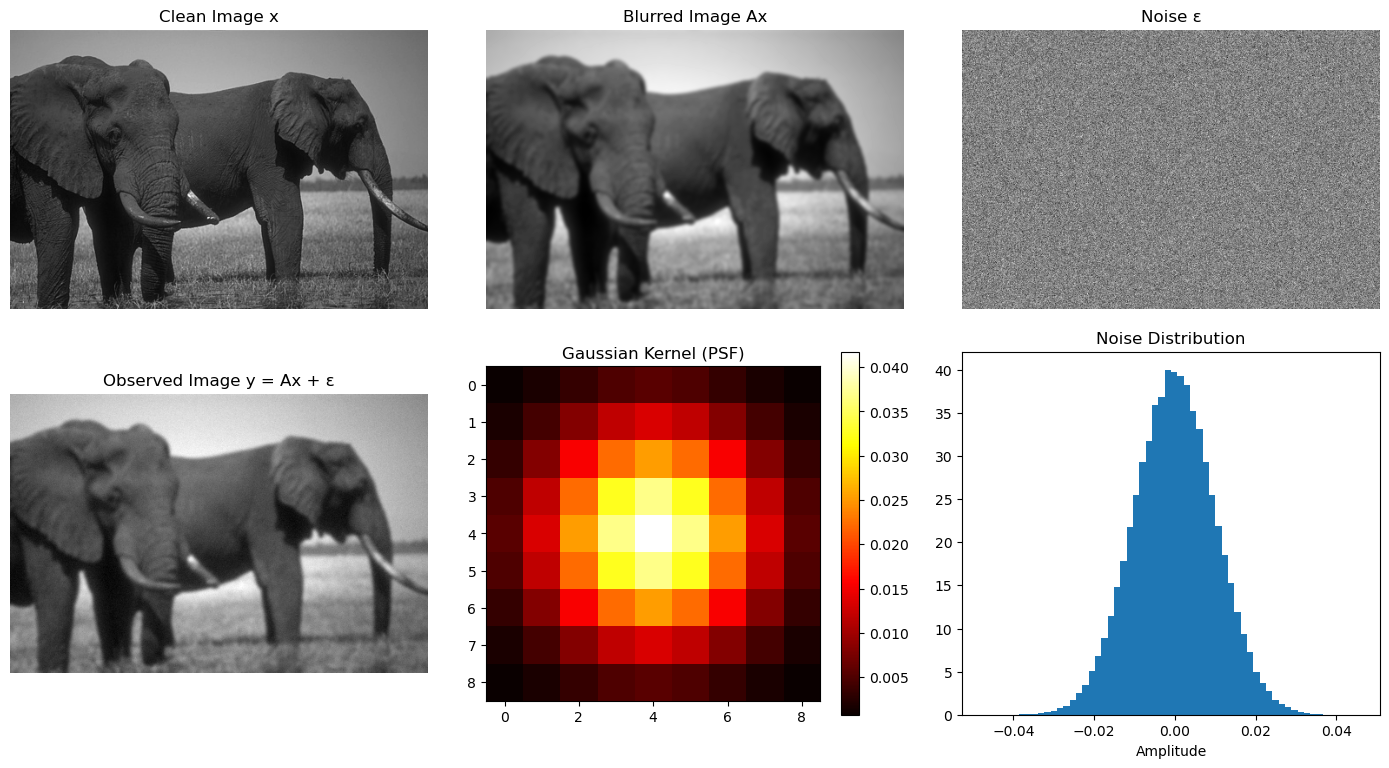

In [17]:
plt.figure(figsize=(14, 8))
plt.subplot(2,3,1)
plt.imshow(x, cmap="gray")
plt.title("Clean Image x")
plt.axis("off")


plt.subplot(2,3,2)
plt.imshow(Ax, cmap="gray")
plt.title("Blurred Image Ax")
plt.axis("off")


plt.subplot(2,3,3)
plt.imshow(eps, cmap="gray")
plt.title("Noise ε")
plt.axis("off")


plt.subplot(2,3,4)
plt.imshow(y, cmap="gray")
plt.title("Observed Image y = Ax + ε")
plt.axis("off")


plt.subplot(2,3,5)
plt.imshow(kernel, cmap="hot")
plt.title("Gaussian Kernel (PSF)")
plt.colorbar()


plt.subplot(2,3,6)
plt.hist(eps.flatten(), bins=60, density=True)
plt.title("Noise Distribution")
plt.xlabel("Amplitude")


plt.tight_layout()
plt.show()

In [ ]:
noise_norm = np.linalg.norm(eps)
signal_norm = np.linalg.norm(Ax)
relative_noise = noise_norm / signal_norm

print("="*50)
print("FORWARD MODEL ANALYSIS")
print("="*50)
print(f"Image size: {x.shape[0]}x{x.shape[1]}")
print(f"Kernel size: 9x9")
print(f"Kernel/Image ratio: {9/x.shape[0]:.2f} (should be < 0.3 for good results)")
print(f"Noise norm: {noise_norm:.6f}")
print(f"Signal norm: {signal_norm:.6f}")
print(f"Relative noise level: {relative_noise:.6f}")

Noise norm: 3.9360487396878328
Signal norm: 162.63939470643157
Relative noise level: 0.02420107838443758
